## Step 1 Construct features using NLTK

In [212]:
import nltk
from nltk.corpus import stopwords
import string

import json


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1025.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [213]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [214]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [215]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [216]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [217]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [218]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [219]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [220]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [221]:
def getNumberOfPronoun(sentences):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
    for s in sentences:        
        for p in pronouns:
            count += s.count(p)
    
    return count

In [222]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [223]:
def getNumberOfConjunction(sents):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        for c in conjunctions:
            count += s.count(c)
    
    return count

In [224]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(sentences)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(sentences)/normalizer)
        

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

223


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfConjunction,numberOfPronoun,numberOfSentences,numberUniqueWords
act,,,,,,,,
THE TWO GENTLEMEN OF VERONA ACT II.,0.023506,0.091991,9.959538,36.txt,0.127974,0.228816,692,0.147998
THE COMEDY OF ERRORS ACT I.,0.041667,0.159722,20.117647,5.txt,0.138523,0.199927,136,0.236111
THE LIFE OF TIMON OF ATHENS ACT V.,0.033139,0.146076,12.873720,32.txt,0.125928,0.200424,293,0.216066
THE HISTORY OF TROILUS AND CRESSIDA ACT I.,0.037166,0.180749,20.326087,34.txt,0.139572,0.144385,184,0.255615
KING RICHARD THE SECOND ACT II.,0.026645,0.114406,15.132118,27.txt,0.157459,0.167846,439,0.183050


In [225]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]
df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction']]

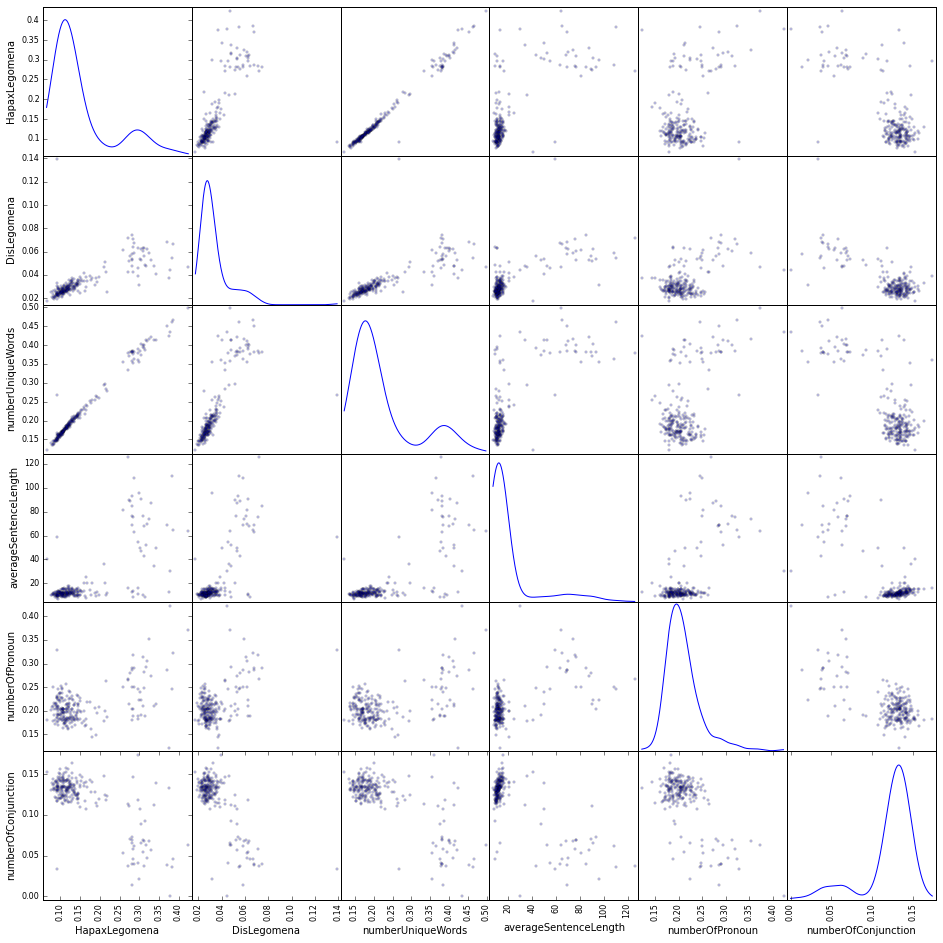

In [200]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [201]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [202]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

In [203]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_counts)
    X_tfidf = tfidf_transformer.transform(X_counts)
    return X_tfidf

In [204]:
randomState = np.random.seed(1)

def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X



In [205]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title)
df_ngrams.head()

Explained variance of the SVD step: 3%


,0,1,2,3,4,5
THE TWO GENTLEMEN OF VERONA ACT II.,0.530665,0.339495,0.405641,0.180416,-0.625319,0.122553
THE COMEDY OF ERRORS ACT I.,0.275671,0.956029,-0.067171,-0.029194,-0.061846,-0.028706
THE LIFE OF TIMON OF ATHENS ACT V.,0.648548,-0.142339,0.528060,0.197642,0.435483,0.227091
THE HISTORY OF TROILUS AND CRESSIDA ACT I.,0.742645,0.293729,-0.079018,-0.484985,0.210429,0.276527
KING RICHARD THE SECOND ACT II.,0.381663,-0.023769,-0.360859,0.656588,-0.454382,0.293220


## Step 3 Combine n-grams and other features

In [142]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,0,1,2,3,4,5
act,,,,,,,,,,,,
THE TWO GENTLEMEN OF VERONA ACT II.,0.091991,0.023506,0.147998,9.959538,0.228816,0.127974,0.530665,0.339495,0.405641,0.180416,-0.625319,0.122553
THE COMEDY OF ERRORS ACT I.,0.159722,0.041667,0.236111,20.117647,0.199927,0.138523,0.275671,0.956029,-0.067171,-0.029194,-0.061846,-0.028706
THE LIFE OF TIMON OF ATHENS ACT V.,0.146076,0.033139,0.216066,12.873720,0.200424,0.125928,0.648548,-0.142339,0.528060,0.197642,0.435483,0.227091
THE HISTORY OF TROILUS AND CRESSIDA ACT I.,0.180749,0.037166,0.255615,20.326087,0.144385,0.139572,0.742645,0.293729,-0.079018,-0.484985,0.210429,0.276527
KING RICHARD THE SECOND ACT II.,0.114406,0.026645,0.183050,15.132118,0.167846,0.157459,0.381663,-0.023769,-0.360859,0.656588,-0.454382,0.293220


## Step 4 Clustering

In [206]:
def clusterDocuments(X, n_clusters):

    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=5, random_state = randomState)
    km.fit_predict(X)    
    return km.labels_

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')

# Cluster only using n-grams as features
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 20)
labels = clusterDocuments(X, n_clusters = 20)
printClusters(labels)

Explained variance of the SVD step: 10%
[1, 21, 64, 166, 172, 204]
['THE COMEDY OF ERRORS ACT I. ' 'THE COMEDY OF ERRORS ACT1593'
 'THE COMEDY OF ERRORS ACT V. ' 'THE COMEDY OF ERRORS ACT III'
 'THE COMEDY OF ERRORS ACT Il.' 'THE COMEDY OF ERRORS ACT IV.']


[6, 7, 16, 25, 36, 41, 48, 50, 51, 57, 58, 69, 73, 101, 105, 113, 114, 116, 130, 141, 146, 149, 154, 156, 199, 206, 216]
['THE TRAGEDY OF CORIOLANUS ACT1608' 'THE LIFE OF TIMON OF ATHENS ACT1608'
 'ALLS WELL THAT ENDS WELL ACT1603' 'THE MERRY WIVES OF WINDSOR ACT1601'
 'MEASURE FOR MEASURE ACT1605' 'THE TWO GENTLEMEN OF VERONA ACT1595'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604'
 'THE TWO GENTLEMEN OF VERONA ACT_4|S' 'THE TRAGEDY OF KING LEAR ACT1606'
 'CYMBELINE ACT1609' 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605'
 'THE TRAGEDY OF ROMEO AND JULIET ACT1595' "THE WINTER'S TALE ACT1611"
 "A MIDSUMMER NIGHT'S DREAM ACT1596"
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT1602' "LOVE'S LABOUR'S LOST ACT1595"
 'THE TRAGEDY OF JULIUS 

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

In [144]:
# Cluster using all features
X = df_all.values
labels = clusterDocuments(X, n_clusters = 8)
printClusters(labels)

[0, 2, 8, 11, 12, 13, 14, 15, 17, 18, 24, 27, 28, 29, 30, 33, 34, 35, 37, 38, 42, 43, 44, 45, 48, 51, 52, 54, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 88, 89, 91, 92, 93, 94, 95, 96, 97, 100, 103, 104, 106, 107, 108, 109, 110, 111, 112, 115, 118, 119, 120, 121, 122, 123, 124, 128, 129, 133, 136, 137, 138, 140, 141, 143, 144, 147, 148, 151, 152, 153, 155, 157, 159, 160, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 182, 184, 187, 190, 194, 196, 197, 200, 201, 203, 204, 205, 208, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 222]
['THE TWO GENTLEMEN OF VERONA ACT II.'
 'THE LIFE OF TIMON OF ATHENS ACT V. '
 'THE TRAGEDY OF ANTONY AND CLEOPATRA ACT I. ' 'AS YOU LIKE IT ACT IV.'
 'THE TRAGEDY OF TITUS ANDRONICUS ACT IV.'
 'THE THIRD PART OF KING HENRY THE SIXTH ACT I. '
 'THE FIRST PART OF HENRY THE SIXTH ACT I. ' "LOVE'S LABOUR'S LOST ACT I. "
 'THE TRAGEDY OF ROMEO AND JULIET ACT IV.'
 'THE TRAG

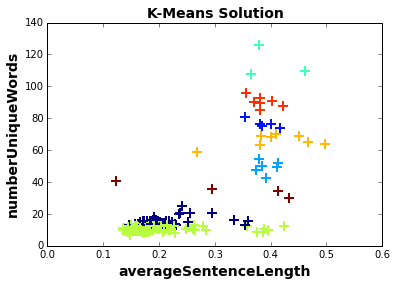

In [227]:
X = df_2.values
labels = clusterDocuments(X, n_clusters = 8)

plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
plt.ylabel('numberUniqueWords', fontsize=14, fontweight='bold')
plt.xlabel('averageSentenceLength', fontsize=14, fontweight='bold')
plt.title('K-Means Solution', fontsize=14, fontweight='bold')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
x, y = np.array(list_x), np.array(list_y)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plotting the raw data points', fontsize=14, fontweight='bold')
plt.show()


In [108]:
df_all.to_excel('all feature-v1027.xlsx')

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).